In [25]:
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
import os
import glob
import numpy as np
import pickle
import math


def clean_data():
    directory = "../DADS5001 Machine Learning/data/clean"

    try:
        os.stat(directory)
    except:
        os.mkdir(directory)

#    dirtys = [
#        '7c9108fe-b240-4632-a024-f1ee922962ec',
#        '20_a2178975-acff-4afe-88b9-f6fee8694ceb',
#        'de366cab-6532-42ed-9926-38351927019b',
#        '76c2e443-c8d1-40b0-96a9-073548c9617b',
#        '21_e95ad3b8-30cb-47ad-9f68-2a5bb7aeb5bb',
#        'e95ad3b8-30cb-47ad-9f68-2a5bb7aeb5bb',
#        'fb05cb2a-c27b-4476-8cff-74f5ddbc8224',
#        '078c1b18-e672-466d-a30b-f49a81710be6',
#        '67ce79dc-de9c-4956-ad7b-fabf7aa9c6fa',
#        '729207eb-f3f7-46e2-986a-74f990296da4',
#        '420994cc-5e99-42eb-84b6-2392486a33b6',
#        '0a9af826-aaf4-45da-9d46-e1b5dc486264'
#    ]

    os.system('cp -r ../DADS5001 Machine Learning/data/raw/* ../DADS5001 Machine Learning/data/clean/')
    os.system('mv ../DADS5001 Machine Learning/data/clean/10 ../DADS5001 Machine Learning/data/clean/0')

#    for i in range(0, 10):
#        for dirty in dirtys:
#            path = directory + '/' + str(i) + '/' + dirty + '.png'
#            os.remove(path)

def make_dataset(data_dir = "../DADS5001 Machine Learning/data/raw/", size = 28):
    X = []
    Y = []
    for folder in os.listdir(data_dir):
        if os.path.isdir(data_dir + folder) == True:
            label = folder
            for file in glob.glob(data_dir + folder + "/*.png"):
                img = load_img(file, grayscale=True, target_size=(size, size))
                img = ImageOps.invert(img)
                x = img_to_array(img)

                X.append(x)
                Y.append(label)
    X = np.asarray(X)
    Y = np.asarray(Y)
    data = {"X": X, "Y": Y};
    pickle.dump(data, open("thainumber_{}.pkl".format(size), "wb"), protocol = 2)

def load_dataset(size = 28):
    data = pickle.load(open("thainumber_{}.pkl".format(size), "rb"))
    X = data['X']
    Y = data['Y']
    return X, Y

def prepare_input(file):
	img = load_img(file, grayscale=True, target_size=(28, 28))
	img = ImageOps.invert(img)
	x = img_to_array(img)
	return x

def img_cloud_dataset(size = 28):
    X, Y = load_dataset(size)
    x = 0
    y = 0
    new_im = Image.new('L', (size * 50, size * math.ceil(X.shape[0] / 50)))
    for i in range(0, X.shape[0]):
        if (i != 0 and i % 50 == 0):
            y += size
            x = 0

        im = array_to_img(X[i])
        new_im.paste(im, (x, y))
        x += size
    new_im.save("cloud_dataset_{}.png".format(size))

In [2]:
make_dataset()

c:\users\th100260\miniconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [3]:
X,Y = load_dataset()

In [4]:
X

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [5]:
Y

array(['1', '1', '1', ..., '9', '9', '9'], dtype='<U2')

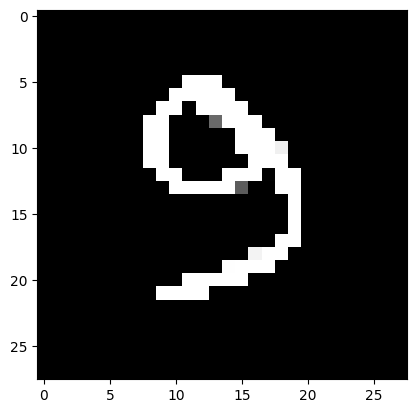

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X[0], cmap='gray', vmin=0, vmax=255)

In [7]:
#Reshape X to change array to dataframe
reshaped_X = X.reshape((X.shape[0], -1))
reshaped_X.shape

(1794, 784)

In [8]:
#Change array to dataframe

import pandas as pd
Ydf = pd.DataFrame(Y)
Xdf = pd.DataFrame(reshaped_X)

In [9]:
Xdf

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
Ydf

,0
0,1
1,1
2,1
3,1
4,1
...,...
1789,9
1790,9
1791,9
1792,9


In [11]:
#Pycaret

from pycaret.classification import *
#clf = setup(Xdf, target = Ydf, train_size = 0.8,
clf = setup(reshaped_X, target = Y, train_size = 0.8,
            numeric_imputation = 'median',
            categorical_imputation = 'mode')

,Description,Value
0,Session id,4987
1,Target,target
2,Target type,Multiclass
3,Target mapping,"1: 0, 10: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9"
4,Original data shape,"(1794, 785)"
5,Transformed data shape,"(1794, 785)"
6,Transformed train set shape,"(1435, 785)"
7,Transformed test set shape,"(359, 785)"
8,Numeric features,784
9,Preprocess,True


In [12]:
top5_model = compare_models(sort = 'Accuracy', fold = 5, n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6383,0.9174,0.6383,0.6505,0.6369,0.5982,0.5998,0.6040
lightgbm,Light Gradient Boosting Machine,0.6314,0.9146,0.6314,0.6397,0.6300,0.5904,0.5916,1.5100
rf,Random Forest Classifier,0.6167,0.9075,0.6167,0.6275,0.6150,0.5741,0.5755,0.6560
xgboost,Extreme Gradient Boosting,0.5749,0.8962,0.5749,0.5833,0.5729,0.5277,0.5289,8.8940
gbc,Gradient Boosting Classifier,0.5707,0.8944,0.5707,0.5876,0.5700,0.5230,0.5249,6.5260
lr,Logistic Regression,0.5080,0.8546,0.5080,0.5145,0.5063,0.4533,0.4543,2.7580
svm,SVM - Linear Kernel,0.4348,0.0000,0.4348,0.4425,0.4319,0.3720,0.3735,0.4580
lda,Linear Discriminant Analysis,0.3902,0.7427,0.3902,0.3970,0.3874,0.3225,0.3237,0.7040
dt,Decision Tree Classifier,0.3693,0.6496,0.3693,0.3719,0.3662,0.2993,0.3001,0.4400
ridge,Ridge Classifier,0.3652,0.0000,0.3652,0.3774,0.3647,0.2946,0.2958,0.4100


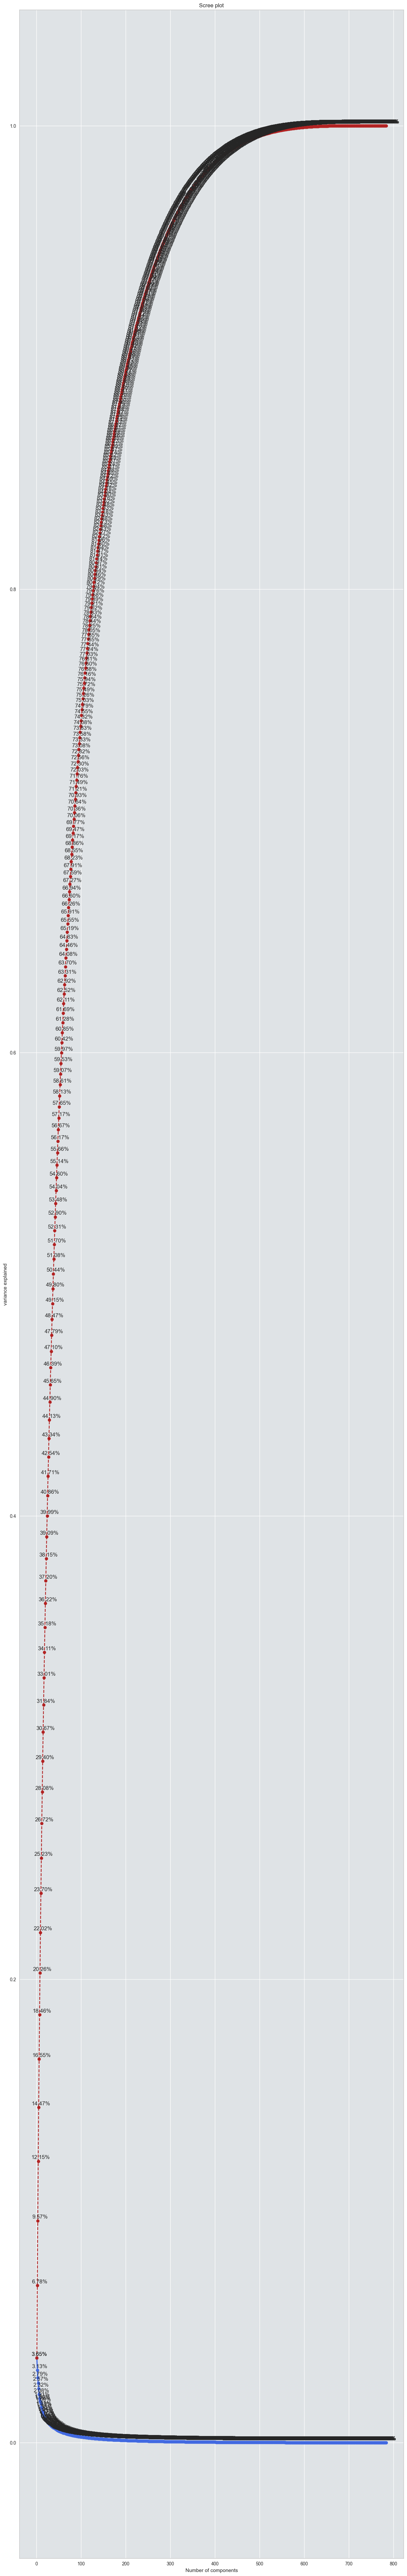

In [13]:
#Scree Plot

from sklearn.decomposition import PCA
pca = PCA(n_components = Xdf.shape[1]) #Maximum component is all features
pca.fit_transform(Xdf) #Fitting PCA
explain_ratio = pca.explained_variance_ratio_
explain_ratio_cum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (15, 100))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.xlabel('Number of components')
plt.ylabel('variance explained')
plt.title('Scree plot')

plt.plot(range(1, explain_ratio.shape[0] + 1), explain_ratio, c = 'royalblue', marker = 'o', linewidth = 2.5, label = 'Individual')
plt.plot(range(1, explain_ratio.shape[0] + 1), explain_ratio_cum, c = 'firebrick', marker = 'o', linestyle = '--', label = 'Cumulative')

for x, ex_ratio, ex_ratio_cum in zip(range(1, explain_ratio.shape[0] + 1),
                                     explain_ratio,
                                     explain_ratio_cum):
    ex_ratio_label = f'{ex_ratio * 100:.2f}%'
    plt.annotate(ex_ratio_label, (x, ex_ratio), textcoords = 'offset points',
               xytext = (5, 5), ha = 'center')
    ex_ratio_cum_label = f'{ex_ratio_cum * 100:.2f}%'
    plt.annotate(ex_ratio_cum_label, (x, ex_ratio_cum), textcoords = 'offset points',
               xytext = (5, 5), ha = 'center')

plt.show()

In [14]:
#Standardization
X_mean = Xdf.mean()
X_std = Xdf.std()
Z = (Xdf-X_mean)/X_std
Z = Z.fillna(0)
Z

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.051011,-0.05905,-0.088204,-0.087068,-0.093692,-0.085483,-0.074848,-0.066909,-0.068623,-0.061493,...,0.0,-0.02361,-0.040916,-0.02361,-0.02361,-0.02361,-0.02361,-0.02361,0.0,0.0
1,-0.051011,-0.05905,-0.088204,-0.087068,-0.093692,-0.085483,-0.074848,-0.066909,-0.068623,-0.061493,...,0.0,-0.02361,-0.040916,-0.02361,-0.02361,-0.02361,-0.02361,-0.02361,0.0,0.0
2,-0.051011,-0.05905,-0.088204,-0.087068,-0.093692,-0.085483,-0.074848,-0.066909,-0.068623,-0.061493,...,0.0,-0.02361,-0.040916,-0.02361,-0.02361,-0.02361,-0.02361,-0.02361,0.0,0.0
3,-0.051011,-0.05905,-0.088204,-0.087068,-0.093692,-0.085483,-0.074848,-0.066909,-0.068623,-0.061493,...,0.0,-0.02361,-0.040916,-0.02361,-0.02361,-0.02361,-0.02361,-0.02361,0.0,0.0
4,-0.051011,-0.05905,-0.088204,-0.087068,-0.093692,-0.085483,-0.074848,-0.066909,-0.068623,-0.061493,...,0.0,-0.02361,-0.040916,-0.02361,-0.02361,-0.02361,-0.02361,-0.02361,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,-0.051011,-0.05905,-0.088204,-0.087068,-0.093692,-0.085483,-0.074848,-0.066909,-0.068623,-0.061493,...,0.0,-0.02361,-0.040916,-0.02361,-0.02361,-0.02361,-0.02361,-0.02361,0.0,0.0
1790,-0.051011,-0.05905,-0.088204,-0.087068,-0.093692,-0.085483,-0.074848,-0.066909,-0.068623,-0.061493,...,0.0,-0.02361,-0.040916,-0.02361,-0.02361,-0.02361,-0.02361,-0.02361,0.0,0.0
1791,-0.051011,-0.05905,-0.088204,-0.087068,-0.093692,-0.085483,-0.074848,-0.066909,-0.068623,-0.061493,...,0.0,-0.02361,-0.040916,-0.02361,-0.02361,-0.02361,-0.02361,-0.02361,0.0,0.0
1792,-0.051011,-0.05905,-0.088204,-0.087068,-0.093692,-0.085483,-0.074848,-0.066909,-0.068623,-0.061493,...,0.0,-0.02361,-0.040916,-0.02361,-0.02361,-0.02361,-0.02361,-0.02361,0.0,0.0


In [15]:
#Covariance
c = Z.cov()
c

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,1.000000,0.598279,0.133405,0.035808,-0.004782,-0.004363,-0.003820,-0.003415,-0.003502,-0.003139,...,0.0,-0.001205,-0.002088,-0.001205,-0.001205,-0.001205,-0.001205,-0.001205,0.0,0.0
1,0.598279,1.000000,0.353514,0.028356,-0.005536,-0.005051,-0.004422,-0.003953,-0.004054,-0.003633,...,0.0,-0.001395,-0.002417,-0.001395,-0.001395,-0.001395,-0.001395,-0.001395,0.0,0.0
2,0.133405,0.353514,1.000000,0.437997,0.072358,-0.007544,-0.006606,-0.005905,-0.006056,-0.005427,...,0.0,-0.002084,-0.003611,-0.002084,-0.002084,-0.002084,-0.002084,-0.002084,0.0,0.0
3,0.035808,0.028356,0.437997,1.000000,0.449885,0.317130,0.258786,0.092990,-0.005978,-0.005357,...,0.0,-0.002057,-0.003564,-0.002057,-0.002057,-0.002057,-0.002057,-0.002057,0.0,0.0
4,-0.004782,-0.005536,0.072358,0.449885,1.000000,0.565069,0.238513,0.085180,0.084725,-0.005765,...,0.0,-0.002213,-0.003836,-0.002213,-0.002213,-0.002213,-0.002213,-0.002213,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-0.001205,-0.001395,-0.002084,-0.002057,-0.002213,-0.002019,-0.001768,-0.001581,-0.001621,-0.001453,...,0.0,-0.000558,-0.000967,-0.000558,1.000000,1.000000,1.000000,1.000000,0.0,0.0
780,-0.001205,-0.001395,-0.002084,-0.002057,-0.002213,-0.002019,-0.001768,-0.001581,-0.001621,-0.001453,...,0.0,-0.000558,-0.000967,-0.000558,1.000000,1.000000,1.000000,1.000000,0.0,0.0
781,-0.001205,-0.001395,-0.002084,-0.002057,-0.002213,-0.002019,-0.001768,-0.001581,-0.001621,-0.001453,...,0.0,-0.000558,-0.000967,-0.000558,1.000000,1.000000,1.000000,1.000000,0.0,0.0
782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [16]:
#Eiganvalues & Eiganvectors
eiganvalues, eiganvectors = np.linalg.eig(c)
print('Eigan Values:\n', eiganvalues)
print('Eigan Values Shape:', eiganvalues.shape)
print('Eigan Vectors Shape:', eiganvectors.shape)

Eigan Values:
 [ 2.52010118e+01+0.00000000e+00j  1.99465856e+01+0.00000000e+00j
  1.71203557e+01+0.00000000e+00j  1.59256514e+01+0.00000000e+00j
  1.45449551e+01+0.00000000e+00j  1.36846617e+01+0.00000000e+00j
  1.22088019e+01+0.00000000e+00j  1.15804218e+01+0.00000000e+00j
  1.13005957e+01+0.00000000e+00j  1.04379649e+01+0.00000000e+00j
  9.98420006e+00+0.00000000e+00j  9.83377867e+00+0.00000000e+00j
  8.90598311e+00+0.00000000e+00j  8.52826642e+00+0.00000000e+00j
  8.43483556e+00+0.00000000e+00j  8.04217775e+00+0.00000000e+00j
  7.62058832e+00+0.00000000e+00j  7.09405627e+00+0.00000000e+00j
  6.91695868e+00+0.00000000e+00j  6.78897005e+00+0.00000000e+00j
  6.54013296e+00+0.00000000e+00j  6.38935931e+00+0.00000000e+00j
  6.20098135e+00+0.00000000e+00j  5.91112506e+00+0.00000000e+00j
  5.79624715e+00+0.00000000e+00j  5.67539013e+00+0.00000000e+00j
  5.65226717e+00+0.00000000e+00j  5.45862031e+00+0.00000000e+00j
  5.37511495e+00+0.00000000e+00j  5.28601790e+00+0.00000000e+00j
  5.188014

In [17]:
#Explained Variance
idx = eiganvalues.argsort()[::-1]
eiganvalues = eiganvalues[idx]
eiganvectors = eiganvectors[:,idx]

explained_var = np.cumsum(eiganvalues)/np.sum(eiganvalues)
explained_var

array([0.03298562-2.66085818e-37j, 0.05909371-4.76692582e-37j,
       0.08150256-6.57458493e-37j, 0.10234765-8.25610075e-37j,
       0.12138555-9.79183523e-37j, 0.13929741-1.12367353e-36j,
       0.15527752-1.25258062e-36j, 0.17043514-1.37485293e-36j,
       0.18522649-1.49417069e-36j, 0.19888875-1.60438033e-36j,
       0.21195708-1.70979888e-36j, 0.22482851-1.81362920e-36j,
       0.23648556-1.90766335e-36j, 0.24764821-1.99770937e-36j,
       0.25868857-2.08676889e-36j, 0.26921498-2.17168252e-36j,
       0.27918958-2.25214479e-36j, 0.28847499-2.32704764e-36j,
       0.2975286 -2.40008061e-36j, 0.30641469-2.47176220e-36j,
       0.31497507-2.54081644e-36j, 0.32333811-2.60827873e-36j,
       0.33145458-2.67375202e-36j, 0.33919165-2.73616485e-36j,
       0.34677836-2.79736474e-36j, 0.35420688-2.85728856e-36j,
       0.36160514-2.91696823e-36j, 0.36874993-2.97460328e-36j,
       0.37578542-3.03135663e-36j, 0.38270429-3.08716924e-36j,
       0.38949489-3.14194708e-36j, 0.39612115-3.1953993

In [18]:
#Find n for 80% Explained Variance
n_components = np.argmax(explained_var >= 0.80) +1
n_components

165

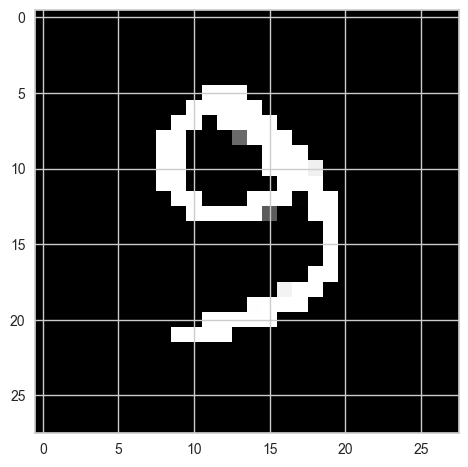

In [19]:
#Dataframe to Array แปะไว้เฉยๆยังไม่ใช้
Xarray = Xdf.values
Xinverse = Xarray.reshape(-1, 28, 28)
plt.imshow(Xinverse[0], cmap='gray', vmin=0, vmax=255)

In [20]:
#Apply PCA
pca = PCA(n_components = 165)
pca.fit(Z)
X_pca = pca.transform(Z)

X_pca
#pca_df = pd.DataFrame(X_pca)
#pca_df

array([[-3.0285406e+00, -4.4313648e-01,  1.2161684e-01, ...,
        -2.1890014e-01, -4.9823761e-02, -4.2246604e-01],
       [-5.3547382e+00,  2.4019778e+00, -1.5124857e+00, ...,
        -6.8471891e-01,  3.3825147e-01, -4.3510777e-01],
       [-6.1758411e-01,  5.3082738e+00, -1.1454231e+01, ...,
         5.9245127e-01, -1.5176195e-01,  5.0204772e-01],
       ...,
       [-3.6294165e+00,  6.0068898e+00, -4.6284189e+00, ...,
        -5.9133154e-01, -2.9390162e-01, -9.4650865e-01],
       [ 2.3133380e+00, -5.8781123e-01, -4.7739363e+00, ...,
         7.4068248e-02,  5.2234745e-01, -9.9062324e-03],
       [-2.9458821e+00, -2.5949953e+00,  3.5228858e+00, ...,
        -1.0697786e-01,  3.0938253e-01, -5.8653362e-02]], dtype=float32)

In [22]:
clf = setup(X_pca, target = Y)

,Description,Value
0,Session id,3981
1,Target,target
2,Target type,Multiclass
3,Target mapping,"1: 0, 10: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9"
4,Original data shape,"(1794, 166)"
5,Transformed data shape,"(1794, 166)"
6,Transformed train set shape,"(1255, 166)"
7,Transformed test set shape,"(539, 166)"
8,Numeric features,165
9,Preprocess,True


In [ ]:
top5_model = compare_models(sort = 'Accuracy', fold = 5, n_select = 5)